In [3]:
import numpy as np
import pandas as pd
import sklearn

In [4]:
df = pd.read_csv('data/Cleaned.csv')

In [6]:
df.columns

Index(['Profession', 'Country', 'Region', 'Education', 'Sex', 'Age', 'AgeBin',
       'Maritial', '1.1_HeardCovid', '1.2_Television/Radio',
       '1.2_Newspaper/Magazines', '1.2_SocialMedia',
       '1.2_Colleagues/Workplace', '1.2_Neighbors', '1.3_CovidKnowledgeLevel',
       '1.4_ContactRespiratoryDrop', '1.4_Touching', '1.4_UseSameObject',
       '1.4_Sex', '1.4_PersonToPerson', '1.4_CloseContact', '1.4_TouchingCoin',
       '1.4_CovidFloatOnAir', '1.5_Fever', '1.5_Tiredness', '1.5_Cough',
       '1.5_ShortnessBreath', '1.5_AchesPain', '1.5_NasalCongestion',
       '1.5_RunningNose', '1.5_SoreThroat', '1.5_Diarrhea', '1.6_Mask',
       '1.7_IncubationPeriod', '1.8_Vaccine', '1.9_LockDown', '1.9_Isolation',
       '1.9_Quarantine', '1.10_Over60Yr', '1.10_PrexistingCond',
       '1.10_WorkEnvo', '1.10_RiskZone', '2.1_LockDown', '2.2_HomeQuarantine',
       '2.3_Isolation', '2.4_PersonalHygiene', '2.5_MediaRole', '2.6_Over60Yr',
       '2.6_PreExisting', '2.6_Working', '2.6_RiskZone',

In [47]:
features = ['Profession', 'Country', 'Education', 'Sex','AgeBin',
       'Maritial']
ys = ['Access_Of_Information','KnowledgeScore', 'OpinionScoring',
       'Susceptiblity', 'BehaveScore', 'PsychologicalHeath']

In [23]:
from sklearn import preprocessing
train_x = pd.DataFrame()

In [24]:
for f in features:
    le = preprocessing.LabelEncoder()
    print(f)
    le.fit(df[f].astype(str))
    train_x[f] = le.transform(df[f].astype(str))

Profession
Country
Education
Sex
Age
Maritial


In [26]:
train_x.Education.value_counts()

2    1697
3     974
1     246
0     114
Name: Education, dtype: int64

In [29]:
train_y = df['KnowledgeScore'].values

In [31]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [32]:
model = LinearRegression()
model.fit(train_x,train_y)
model.coef_

array([ 0.44639235, -0.01226412,  0.08161799,  0.05800676, -0.00742954,
        0.21610246])

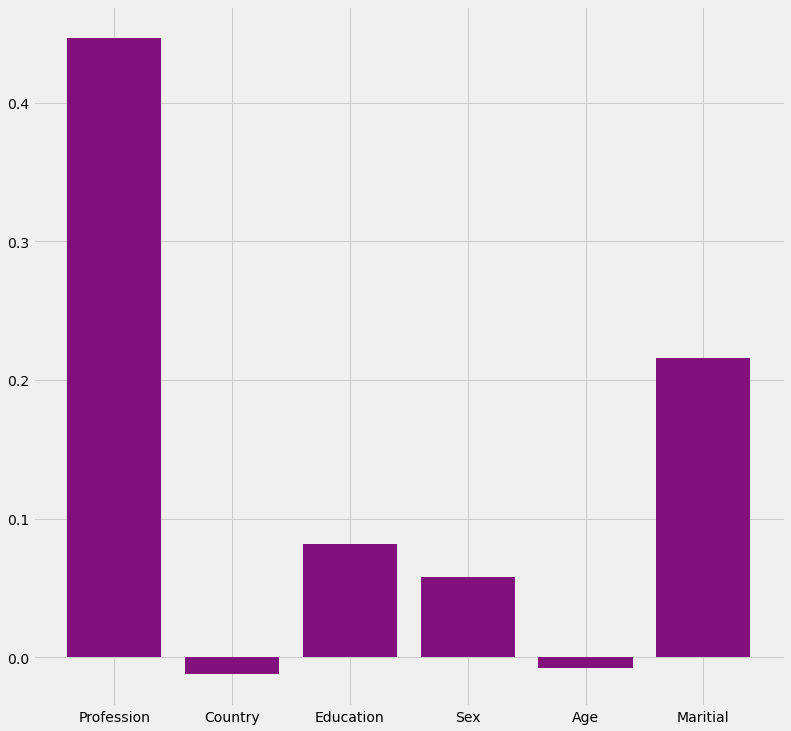

In [37]:
plt.rcParams['figure.figsize'] = (12,12)
plt.style.use('fivethirtyeight')
for i, v in enumerate(model.coef_):
    plt.bar(features,model.coef_)

In [44]:
from xgboost import XGBRegressor

In [43]:
!pip install xgboost

  Using cached xgboost-1.3.3-py3-none-manylinux2010_x86_64.whl (157.5 MB)


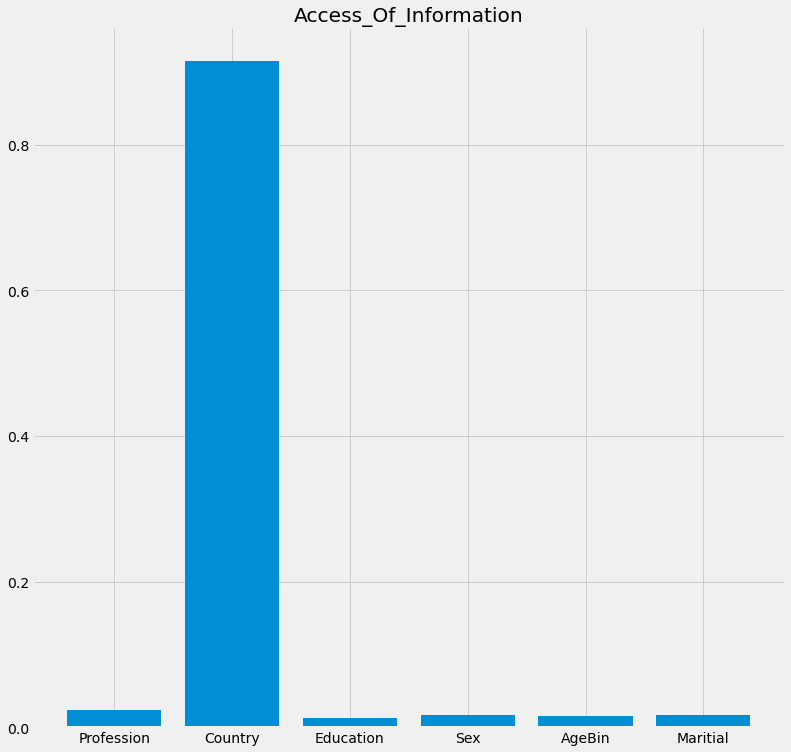

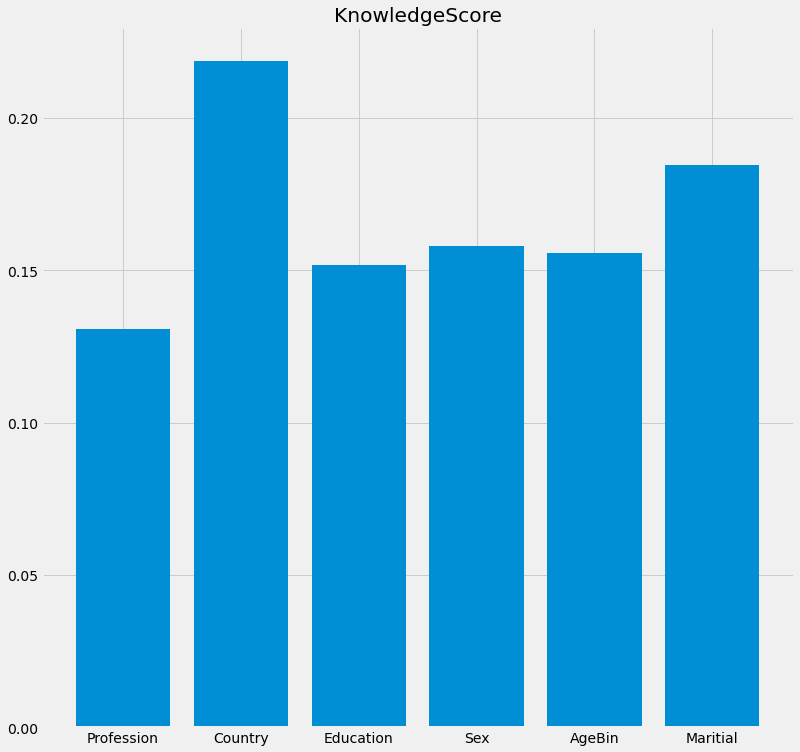

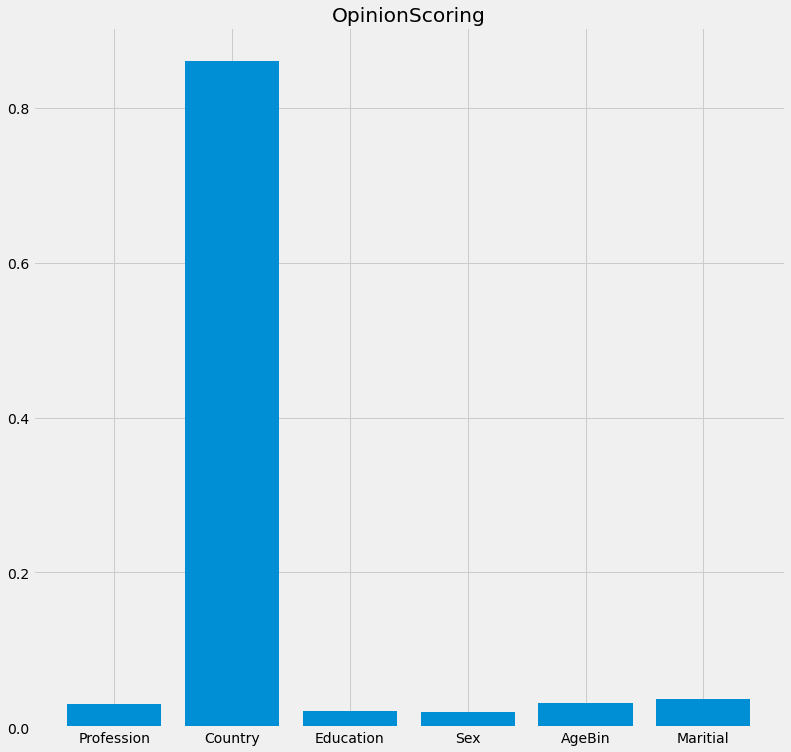

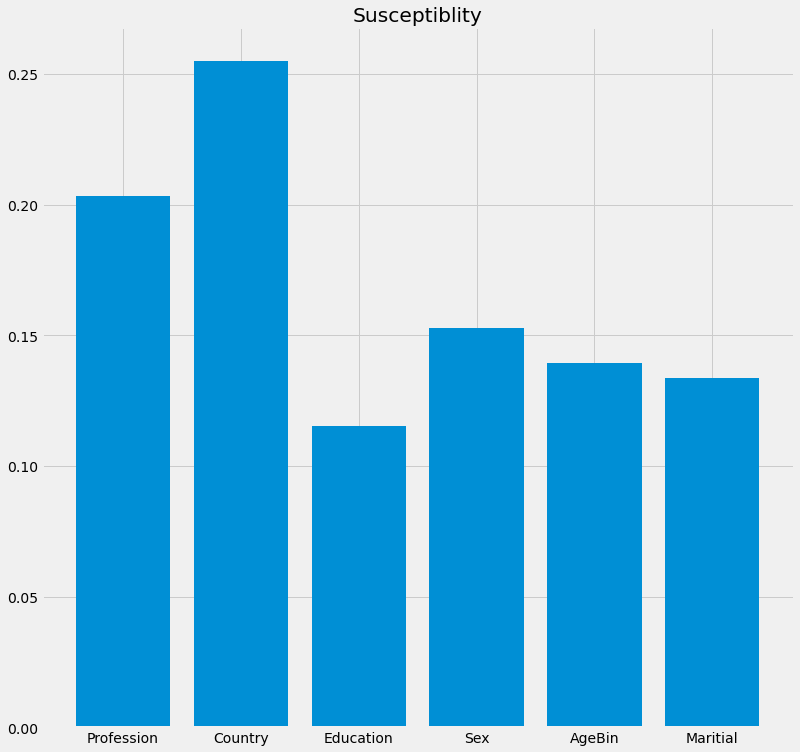

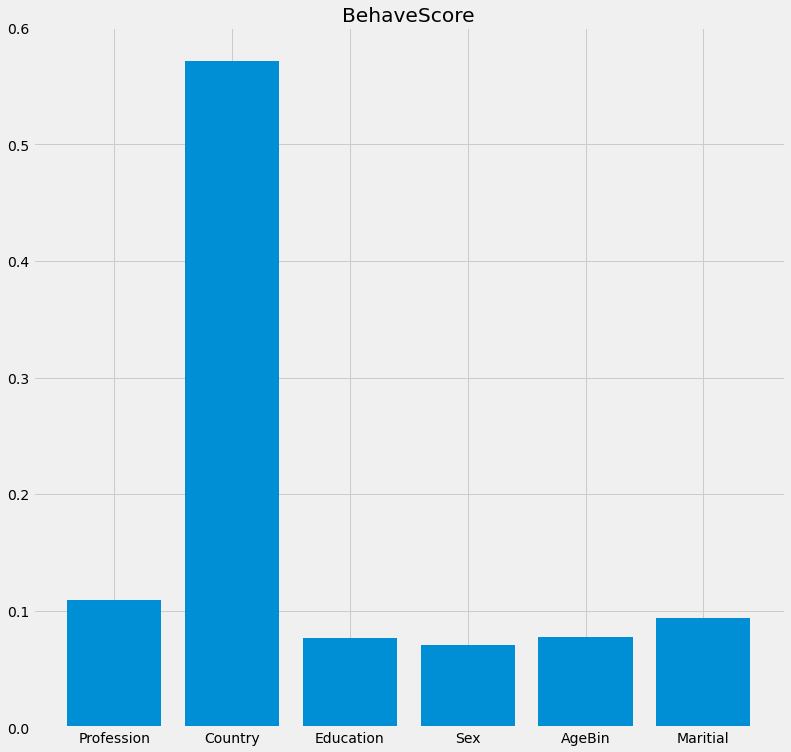

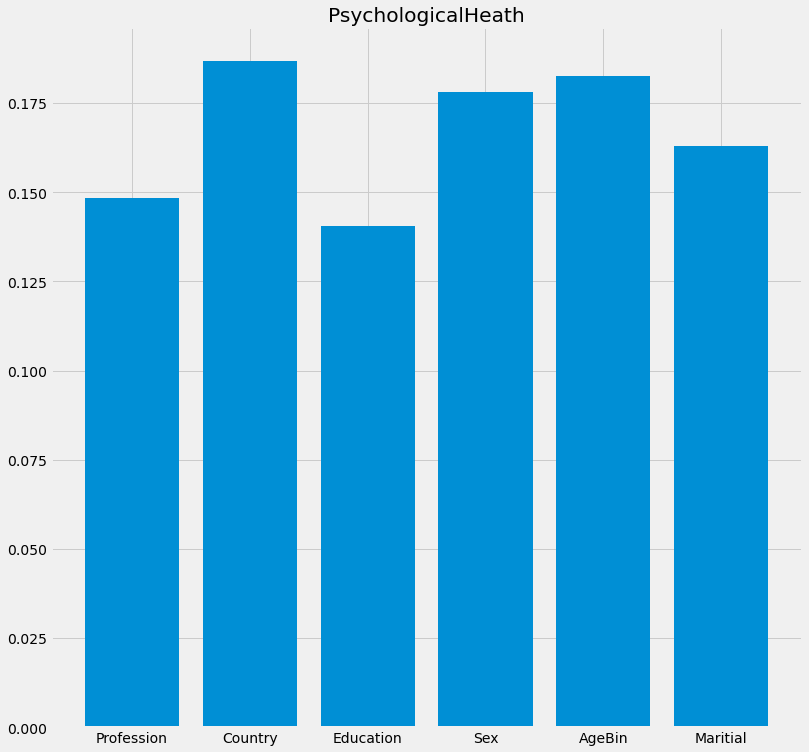

In [51]:
for y in ys:
    model = XGBRegressor()
    model.fit(train_x,df[y].values)
    importance = model.feature_importances_
    plt.figure()
    plt.bar(features,importance)
    plt.title(y)
    plt.savefig(f'FeatureImportance_{y}',dpi=80)